# Importing Libraries

In [301]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

# Reading file

In [302]:
df=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\HistoricalData.csv",encoding='ISO-8859-1')

In [303]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/02/2021,$139.96,78945570,$137.9,$140,$137.745
1,07/01/2021,$137.27,52485780,$136.6,$137.33,$135.76
2,06/30/2021,$136.96,63261390,$136.17,$137.41,$135.87
3,06/29/2021,$136.33,64556080,$134.8,$136.49,$134.35
4,06/28/2021,$134.78,62111300,$133.41,$135.245,$133.35


In [304]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
1254,07/11/2016,$24.245,93271960,$24.1875,$24.4125,$24.1825
1255,07/08/2016,$24.17,115510000,$24.1225,$24.2225,$24.0125
1256,07/07/2016,$23.985,97843400,$23.925,$24.125,$23.905
1257,07/06/2016,$23.8825,123510160,$23.65,$23.915,$23.5925
1258,07/05/2016,$23.7475,110215000,$23.8475,$23.85,$23.615


In [305]:
df.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

# Renaming Columns

In [306]:
df=df.rename(columns={'Close/Last':'Close'})

In [307]:
df.head()

,Date,Close,Volume,Open,High,Low
0,07/02/2021,$139.96,78945570,$137.9,$140,$137.745
1,07/01/2021,$137.27,52485780,$136.6,$137.33,$135.76
2,06/30/2021,$136.96,63261390,$136.17,$137.41,$135.87
3,06/29/2021,$136.33,64556080,$134.8,$136.49,$134.35
4,06/28/2021,$134.78,62111300,$133.41,$135.245,$133.35


# Converting Data type

In [308]:
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y')

In [309]:
df.head()

,Date,Close,Volume,Open,High,Low
0,2021-07-02,$139.96,78945570,$137.9,$140,$137.745
1,2021-07-01,$137.27,52485780,$136.6,$137.33,$135.76
2,2021-06-30,$136.96,63261390,$136.17,$137.41,$135.87
3,2021-06-29,$136.33,64556080,$134.8,$136.49,$134.35
4,2021-06-28,$134.78,62111300,$133.41,$135.245,$133.35


In [310]:
df['Close']=df['Close'].replace('[\$]','',regex=True).astype(float)

In [311]:
df[df.columns[3:]]=df[df.columns[3:]].replace('[\$]','',regex=True).astype(float)

In [312]:
df

,Date,Close,Volume,Open,High,Low
0,2021-07-02,139.9600,78945570,137.9000,140.0000,137.7450
1,2021-07-01,137.2700,52485780,136.6000,137.3300,135.7600
2,2021-06-30,136.9600,63261390,136.1700,137.4100,135.8700
3,2021-06-29,136.3300,64556080,134.8000,136.4900,134.3500
4,2021-06-28,134.7800,62111300,133.4100,135.2450,133.3500
...,...,...,...,...,...,...
1254,2016-07-11,24.2450,93271960,24.1875,24.4125,24.1825
1255,2016-07-08,24.1700,115510000,24.1225,24.2225,24.0125
1256,2016-07-07,23.9850,97843400,23.9250,24.1250,23.9050
1257,2016-07-06,23.8825,123510160,23.6500,23.9150,23.5925


In [313]:
df.describe()

,Close,Volume,Open,High,Low
count,1259.000000,1.259000e+03,1259.000000,1259.000000,1259.000000
mean,62.175421,1.257048e+08,62.137779,62.810971,61.477203
std,33.129425,5.727528e+07,33.156412,33.586930,32.646245
min,23.747500,4.544820e+07,23.650000,23.850000,23.592500
25%,39.100000,8.798754e+07,39.185000,39.471250,38.776250
50%,48.185000,1.098748e+08,48.105000,48.615000,47.787500
75%,77.396250,1.455448e+08,77.270000,78.270000,76.385000
max,143.160000,4.473492e+08,143.600000,145.090000,141.370000


# Detecting Outliers

C:\Users\rmkis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


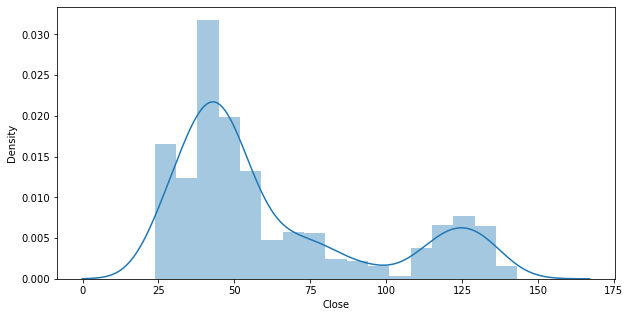

In [314]:
plt.figure(figsize=(10,5))
sns.distplot(df['Close'])
plt.show()

C:\Users\rmkis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

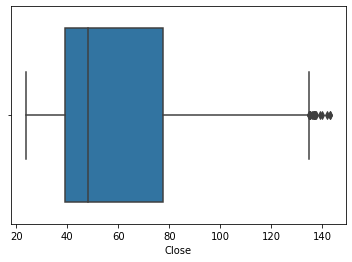

In [315]:
sns.boxplot(df["Close"])

# Handling Outliers using Inter Quartile Range

In [316]:
Q1=df["Close"].quantile(0.25)
Q3=df["Close"].quantile(0.75)
print(Q1,Q3)
iqr=Q3-Q1
iqr

39.099999999999994 77.39625000000001


38.296250000000015

In [317]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
print(upper_limit,lower_limit)

134.84062500000005 -18.344375000000028


In [318]:
new_df = df[df['Close'] < lower_limit] 
new_df.shape

(0, 6)

In [319]:
new_df = df[df['Close'] > upper_limit] 
new_df.shape

(20, 6)

# Trimming outliers

In [320]:
new_df = df[df['Close'] < upper_limit] 
new_df.shape

(1239, 6)

C:\Users\rmkis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rmkis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rmkis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

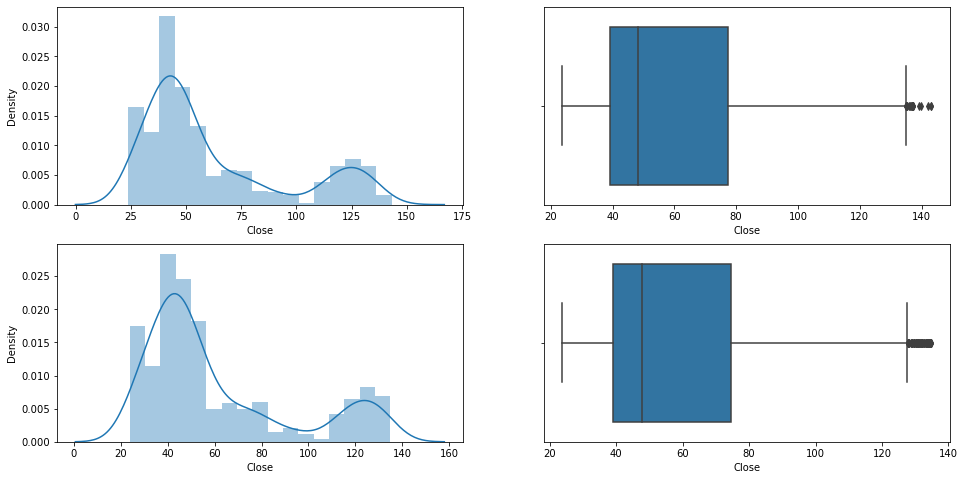

In [321]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Close'])
plt.subplot(2,2,2)
sns.boxplot(df['Close'])
plt.subplot(2,2,3)
sns.distplot(new_df['Close'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Close'])
plt.show()

# Capping Outliers

In [322]:
new_df_cap = df.copy()
new_df_cap['Close'] = np.where(
    new_df_cap['Close'] > upper_limit,upper_limit,
    np.where(new_df_cap['Close'] < lower_limit,lower_limit,
        new_df_cap['Close']
    )
)

C:\Users\rmkis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rmkis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rmkis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

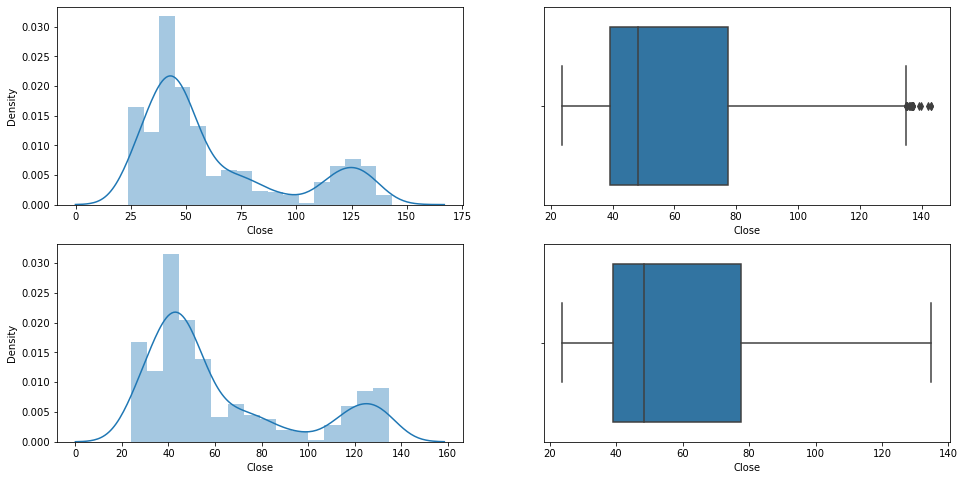

In [323]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Close'])
plt.subplot(2,2,2)
sns.boxplot(df['Close'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Close'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Close'])
plt.show()

# Reading Headlines Dataset

In [324]:
df15=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\2015.csv",encoding='ISO-8859-1')
df16=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\2016.csv",encoding='ISO-8859-1')
df17=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\2017.csv",encoding='ISO-8859-1')
df18=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\2018.csv",encoding='ISO-8859-1')
df19=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\2019.csv",encoding='ISO-8859-1')
df20=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\2020.csv",encoding='ISO-8859-1')
df21=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\2021.csv",encoding='ISO-8859-1')

In [325]:
df1=pd.concat([df15,df16,df17,df18,df19,df20,df21])

In [326]:
df1

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-01-02,What to expect from Apple in 2015 beyond its s...
2,2015-01-03,Mountie: An inexpensive and innovative way to ...
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
...,...,...
169,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
170,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
171,2021-06-21,Apple is shortening new free TV Plus trials fr...
172,2021-06-22,Google likely to soon face antitrust claims ov...


In [327]:
df1.dtypes

Date         object
Headlines    object
dtype: object

In [328]:
df1['Date']=pd.to_datetime(df1['Date'],format='%Y/%m/%d')

In [329]:
df1["Headlines"]=df1["Headlines"].astype(str)
df1['Headlines']=df1['Headlines'].apply(lambda x: x.lower())

# Removing Punctuations and Stopwords

In [330]:
import string
def punctuation_removal(text):
    li=[char for char in text if char not in string.punctuation]
    clean_str=''.join(li)
    li.clear()
    return clean_str
df1["Headlines"]=df1["Headlines"].astype(str)
df1['Headlines']=df1['Headlines'].apply(punctuation_removal)
df1

,Date,Headlines
0,2015-01-01,what can we expect from apple inc in 2015 1 re...
1,2015-01-02,what to expect from apple in 2015 beyond its s...
2,2015-01-03,mountie an inexpensive and innovative way to a...
3,2015-01-04,donald yacktman on the sources of moats his co...
4,2015-01-05,simfree iphone 6 6 plus reportedly debuting to...
...,...,...
169,2021-06-19,best preprime day smartwatch deals on apple wa...
170,2021-06-20,iphone 13 rumors as apples fall event gets clo...
171,2021-06-21,apple is shortening new free tv plus trials fr...
172,2021-06-22,google likely to soon face antitrust claims ov...


In [331]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df1['Headlines'] = df1['Headlines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rmkis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [332]:
df1

,Date,Headlines
0,2015-01-01,expect apple inc 2015 1 reason might wrong app...
1,2015-01-02,expect apple 2015 beyond smartwatch amazonquot...
2,2015-01-03,mountie inexpensive innovative way attach ipho...
3,2015-01-04,donald yacktman sources moats concern applequo...
4,2015-01-05,simfree iphone 6 6 plus reportedly debuting to...
...,...,...
169,2021-06-19,best preprime day smartwatch deals apple watch...
170,2021-06-20,iphone 13 rumors apples fall event gets closer...
171,2021-06-21,apple shortening new free tv plus trials year ...
172,2021-06-22,google likely soon face antitrust claims play ...


In [333]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
def split_to_lemma(text):
    lemma=WordNetLemmatizer()
    words=word_tokenize(text)
    return ' '.join([lemma.lemmatize(word) for word in words])
df1['Headlines'] = df1['Headlines'].apply(split_to_lemma)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rmkis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rmkis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [334]:
df1

,Date,Headlines
0,2015-01-01,expect apple inc 2015 1 reason might wrong app...
1,2015-01-02,expect apple 2015 beyond smartwatch amazonquot...
2,2015-01-03,mountie inexpensive innovative way attach ipho...
3,2015-01-04,donald yacktman source moat concern applequots...
4,2015-01-05,simfree iphone 6 6 plus reportedly debuting to...
...,...,...
169,2021-06-19,best preprime day smartwatch deal apple watch ...
170,2021-06-20,iphone 13 rumor apple fall event get closer se...
171,2021-06-21,apple shortening new free tv plus trial year t...
172,2021-06-22,google likely soon face antitrust claim play s...


# Merging both Datasets

In [335]:
df=pd.merge(df,df1,on=['Date'],how='outer')

In [336]:
df

,Date,Close,Volume,Open,High,Low,Headlines
0,2021-07-02,139.96,78945570.0,137.90,140.000,137.745,NaN
1,2021-07-01,137.27,52485780.0,136.60,137.330,135.760,NaN
2,2021-06-30,136.96,63261390.0,136.17,137.410,135.870,NaN
3,2021-06-29,136.33,64556080.0,134.80,136.490,134.350,NaN
4,2021-06-28,134.78,62111300.0,133.41,135.245,133.350,NaN
...,...,...,...,...,...,...,...
2390,2021-06-06,NaN,NaN,NaN,NaN,NaN,facebookquots trump ban last least 2 year glob...
2391,2021-06-12,NaN,NaN,NaN,NaN,NaN,japan start antitrust probe apple google nikke...
2392,2021-06-13,NaN,NaN,NaN,NaN,NaN,watch next oil crisis sector watch apple store...
2393,2021-06-19,NaN,NaN,NaN,NaN,NaN,best preprime day smartwatch deal apple watch ...


# Handling Null Values

In [337]:
df.isnull().sum()

Date            0
Close        1116
Volume       1116
Open         1116
High         1116
Low          1116
Headlines      30
dtype: int64

In [338]:
Close_mean=df["Close"].mean()
Volume_mean=df["Volume"].mean()
Open_mean=df["Open"].mean()
High_mean=df["High"].mean()
Low_mean=df["Low"].mean()

In [339]:
df['Close'].fillna(value=Close_mean,inplace=True)
df['Volume'].fillna(value=Volume_mean,inplace=True)
df['Open'].fillna(value=Open_mean,inplace=True)
df['High'].fillna(value=High_mean,inplace=True)
df['Low'].fillna(value=Low_mean,inplace=True)

In [340]:
df=df.dropna()

In [341]:
df

,Date,Close,Volume,Open,High,Low,Headlines
7,2021-06-23,133.700000,6.021420e+07,133.770000,134.320000,133.230000,french court set date apple case app store dev...
8,2021-06-22,133.980000,7.478362e+07,132.130000,134.080000,131.620000,google likely soon face antitrust claim play s...
9,2021-06-21,132.300000,7.966332e+07,130.300000,132.410000,129.210000,apple shortening new free tv plus trial year t...
10,2021-06-18,130.460000,1.089533e+08,130.710000,131.510000,130.240000,well fargo update bestideas signature pick lis...
11,2021-06-17,131.790000,9.672167e+07,129.800000,132.550000,129.650000,apple award grant computer chip course histori...
...,...,...,...,...,...,...,...
2390,2021-06-06,62.229443,1.251431e+08,62.189158,62.858732,61.533235,facebookquots trump ban last least 2 year glob...
2391,2021-06-12,62.229443,1.251431e+08,62.189158,62.858732,61.533235,japan start antitrust probe apple google nikke...
2392,2021-06-13,62.229443,1.251431e+08,62.189158,62.858732,61.533235,watch next oil crisis sector watch apple store...
2393,2021-06-19,62.229443,1.251431e+08,62.189158,62.858732,61.533235,best preprime day smartwatch deal apple watch ...


In [342]:
hist=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\hist.csv",encoding='ISO-8859-1')
m1=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\m1.csv",encoding='ISO-8859-1')
m2=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\m2.csv",encoding='ISO-8859-1')
s1=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\s1.csv",encoding='ISO-8859-1')
s2=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\s2.csv",encoding='ISO-8859-1')
s3=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\s3.csv",encoding='ISO-8859-1')
s4=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\s4.csv",encoding='ISO-8859-1')
s5=pd.read_csv(r"C:\Users\rmkis\Desktop\Datasets\s5.csv",encoding='ISO-8859-1')

In [343]:
hist.columns

Index(['Outcome', 'Message', 'Identity', 'Delay', 'Headlines Securities CIK',
       'Headlines Securities CUSIP', 'Headlines Securities Symbol',
       'Headlines Securities ISIN', 'Headlines Securities Valoren',
       'Headlines Securities Name', 'Headlines Securities Market',
       'Headlines Securities MarketIdentificationCode',
       'Headlines Securities MostLiquidExchange',
       'Headlines Securities CategoryOrIndustry', 'Headlines Title',
       'Headlines Date', 'Headlines Time', 'Headlines UTCOffset',
       'Headlines Source', 'Headlines Url', 'Headlines Images',
       'Headlines Tags TagType', 'Headlines Tags TagValues',
       'Headlines PaywallType', 'Headlines Summary'],
      dtype='object')

In [344]:
hist.rename(columns={'Headlines Securities CIK':'Security CIK','Headlines Securities CUSIP':'Security CUSIP', 'Headlines Securities Symbol':'Security Symbol','Headlines Securities ISIN':'Security ISIN','Headlines Securities Valoren':'Security Valoren','Headlines Securities Name':'Security Name','Headlines Securities Market':'Security Market','Headlines Securities MarketIdentificationCode':'Security MarketIdentificationCode','Headlines Securities MostLiquidExchange':'Security MostLiquidExchange','Headlines Securities CategoryOrIndustry':'Security CategoryOrIndustry'},inplace=True)

In [345]:
m1.columns

Index(['Outcome', 'Message', 'Identity', 'Delay', 'Headlines Securities CIK',
       'Headlines Securities CUSIP', 'Headlines Securities Symbol',
       'Headlines Securities ISIN', 'Headlines Securities Valoren',
       'Headlines Securities Name', 'Headlines Securities Market',
       'Headlines Securities MarketIdentificationCode',
       'Headlines Securities MostLiquidExchange',
       'Headlines Securities CategoryOrIndustry', 'Headlines Title',
       'Headlines Date', 'Headlines Time', 'Headlines UTCOffset',
       'Headlines Source', 'Headlines Url', 'Headlines Images',
       'Headlines Tags TagType', 'Headlines Tags TagValues',
       'Headlines PaywallType', 'Headlines Summary'],
      dtype='object')

In [346]:
m1.rename(columns={'Headlines Securities CIK':'Security CIK','Headlines Securities CUSIP':'Security CUSIP', 'Headlines Securities Symbol':'Security Symbol','Headlines Securities ISIN':'Security ISIN','Headlines Securities Valoren':'Security Valoren','Headlines Securities Name':'Security Name','Headlines Securities Market':'Security Market','Headlines Securities MarketIdentificationCode':'Security MarketIdentificationCode','Headlines Securities MostLiquidExchange':'Security MostLiquidExchange','Headlines Securities CategoryOrIndustry':'Security CategoryOrIndustry'},inplace=True)

In [347]:
m2.columns

Index(['Outcome', 'Message', 'Identity', 'Delay', 'Headlines Securities CIK',
       'Headlines Securities CUSIP', 'Headlines Securities Symbol',
       'Headlines Securities ISIN', 'Headlines Securities Valoren',
       'Headlines Securities Name', 'Headlines Securities Market',
       'Headlines Securities MarketIdentificationCode',
       'Headlines Securities MostLiquidExchange',
       'Headlines Securities CategoryOrIndustry', 'Headlines Title',
       'Headlines Date', 'Headlines Time', 'Headlines UTCOffset',
       'Headlines Source', 'Headlines Url', 'Headlines Images',
       'Headlines Tags TagType', 'Headlines Tags TagValues',
       'Headlines PaywallType', 'Headlines Summary'],
      dtype='object')

In [348]:
m2.rename(columns={'Headlines Securities CIK':'Security CIK','Headlines Securities CUSIP':'Security CUSIP', 'Headlines Securities Symbol':'Security Symbol','Headlines Securities ISIN':'Security ISIN','Headlines Securities Valoren':'Security Valoren','Headlines Securities Name':'Security Name','Headlines Securities Market':'Security Market','Headlines Securities MarketIdentificationCode':'Security MarketIdentificationCode','Headlines Securities MostLiquidExchange':'Security MostLiquidExchange','Headlines Securities CategoryOrIndustry':'Security CategoryOrIndustry'},inplace=True)

In [349]:
s1.columns

Index(['Outcome', 'Message', 'Identity', 'Delay', 'Security CIK',
       'Security CUSIP', 'Security Symbol', 'Security ISIN',
       'Security Valoren', 'Security Name', 'Security Market',
       'Security MarketIdentificationCode', 'Security MostLiquidExchange',
       'Security CategoryOrIndustry', 'Headlines Title', 'Headlines Date',
       'Headlines Time', 'Headlines UTCOffset', 'Headlines Source',
       'Headlines Url', 'Headlines Images', 'Headlines Tags TagType',
       'Headlines Tags TagValues', 'Headlines PaywallType',
       'Headlines Summary'],
      dtype='object')

In [391]:
data=pd.concat([hist,m1,m2,s1,s2,s3,s4,s5])

In [392]:
data

,Outcome,Message,Identity,Delay,Security CIK,Security CUSIP,Security Symbol,Security ISIN,Security Valoren,Security Name,...,Headlines Date,Headlines Time,Headlines UTCOffset,Headlines Source,Headlines Url,Headlines Images,Headlines Tags TagType,Headlines Tags TagValues,Headlines PaywallType,Headlines Summary
0,Success,NaN,Request,0.482025,NaN,NaN,NaN,NaN,NaN,NaN,...,6/9/2021,11:56 PM,0,Globe Newswire,https://www.globenewswire.com/news-release/202...,NaN,Symbols,NaN,None,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
1,Success,NaN,Request,0.482025,NaN,NaN,NaN,NaN,NaN,NaN,...,6/9/2021,11:56 PM,0,Globe Newswire,https://www.globenewswire.com/news-release/202...,NaN,Companies,NaN,None,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
2,Success,NaN,Request,0.482025,NaN,NaN,NaN,NaN,NaN,NaN,...,6/9/2021,11:56 PM,0,Globe Newswire,https://www.globenewswire.com/news-release/202...,NaN,Sectors,NaN,None,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
3,Success,NaN,Request,0.482025,NaN,NaN,NaN,NaN,NaN,NaN,...,6/9/2021,11:56 PM,0,Globe Newswire,https://www.globenewswire.com/news-release/202...,NaN,Topics,NaN,None,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
4,Success,NaN,Request,0.482025,1557746.0,NaN,ACRS,NaN,29306378.0,Aclaris Therapeutics Inc,...,6/9/2021,11:55 PM,0,Globe Newswire,https://www.globenewswire.com/news-release/202...,NaN,Topics,NaN,None,"WAYNE, Pa., June 09, 2021 (GLOBE NEWSWIRE) -- ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12672,Success,"Results are limited to 1000 items, so your res...",Request,0.558012,320193.0,NaN,AAPL,NaN,908440.0,Apple Inc,...,5/28/2021,8:35 PM,0,SeekingAlpha.com: All News,https://seekingalpha.com/news/3701385-apple-re...,https://i.insider.com/60ae8e11bee0fc0019d59b5f...,Symbols,AAPL,Soft,NaN
12673,Success,"Results are limited to 1000 items, so your res...",Request,0.558012,320193.0,NaN,AAPL,NaN,908440.0,Apple Inc,...,5/28/2021,8:35 PM,0,SeekingAlpha.com: All News,https://seekingalpha.com/news/3701385-apple-re...,https://i.insider.com/60ae8e11bee0fc0019d59b5f...,Companies,Apple Inc.,Soft,NaN
12674,Success,"Results are limited to 1000 items, so your res...",Request,0.558012,320193.0,NaN,AAPL,NaN,908440.0,Apple Inc,...,5/28/2021,8:35 PM,0,SeekingAlpha.com: All News,https://seekingalpha.com/news/3701385-apple-re...,https://i.insider.com/60ae8e11bee0fc0019d59b5f...,Sectors,Technology,Soft,NaN
12675,Success,"Results are limited to 1000 items, so your res...",Request,0.558012,320193.0,NaN,AAPL,NaN,908440.0,Apple Inc,...,5/28/2021,8:35 PM,0,SeekingAlpha.com: All News,https://seekingalpha.com/news/3701385-apple-re...,https://i.insider.com/60ae8e11bee0fc0019d59b5f...,Topics,Business_Finance,Soft,NaN


In [393]:
cols=['Outcome','Identity','Delay','Security CIK','Security Valoren','Headlines UTCOffset','Headlines Url','Headlines Images','Headlines PaywallType','Headlines Source','Security MostLiquidExchange','Message','Security CUSIP','Security ISIN','Headlines Time','Security MarketIdentificationCode','Headlines Tags TagType']

In [394]:
data=data.drop(cols,axis=1)

In [395]:
data

,Security Symbol,Security Name,Security Market,Security CategoryOrIndustry,Headlines Title,Headlines Date,Headlines Tags TagValues,Headlines Summary
0,NaN,NaN,NaN,NaN,Introducing The Dharma Coaching Institute - Th...,6/9/2021,NaN,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
1,NaN,NaN,NaN,NaN,Introducing The Dharma Coaching Institute - Th...,6/9/2021,NaN,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
2,NaN,NaN,NaN,NaN,Introducing The Dharma Coaching Institute - Th...,6/9/2021,NaN,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
3,NaN,NaN,NaN,NaN,Introducing The Dharma Coaching Institute - Th...,6/9/2021,NaN,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
4,ACRS,Aclaris Therapeutics Inc,NASDAQ,PharmaceuticalsOther,Aclaris Announces Pricing of Public Offering o...,6/9/2021,NaN,"WAYNE, Pa., June 09, 2021 (GLOBE NEWSWIRE) -- ..."
...,...,...,...,...,...,...,...,...
12672,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,5/28/2021,AAPL,NaN
12673,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,5/28/2021,Apple Inc.,NaN
12674,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,5/28/2021,Technology,NaN
12675,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,5/28/2021,Business_Finance,NaN


In [396]:
data.reset_index(drop=True,inplace=True)

In [397]:
data.duplicated().sum()

12113

In [398]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [399]:
data.shape

(47794, 8)

In [400]:
data.dtypes

Security Symbol                object
Security Name                  object
Security Market                object
Security CategoryOrIndustry    object
Headlines Title                object
Headlines Date                 object
Headlines Tags TagValues       object
Headlines Summary              object
dtype: object

In [401]:
data['Headlines Date']=pd.to_datetime(data['Headlines Date'],format='%m/%d/%Y')

C:\Users\rmkis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Headlines Date', ylabel='Density'>

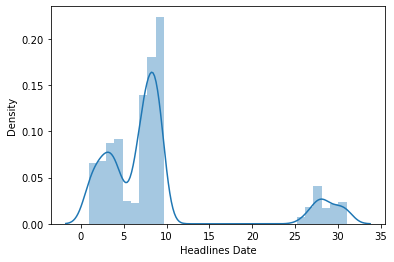

In [402]:
day=data['Headlines Date'].dt.day
sns.distplot(day,bins=31)

C:\Users\rmkis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Headlines Date'>

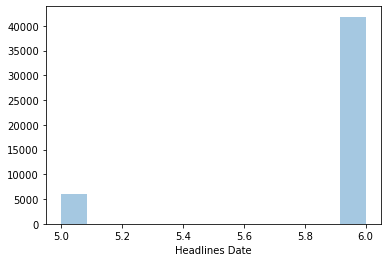

In [403]:
month=data['Headlines Date'].dt.month
sns.distplot(month,bins=12,kde=False)

In [404]:
data=data[data['Security Symbol']=='AAPL']

In [405]:
data

,Security Symbol,Security Name,Security Market,Security CategoryOrIndustry,Headlines Title,Headlines Date,Headlines Tags TagValues,Headlines Summary
1695,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,athenahealth is set to support the iOS 15 Feat...,2021-06-09,Consumer_Services,It's being announced this afternoon that athen...
1696,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,athenahealth is set to support the iOS 15 Feat...,2021-06-09,EVDY,It's being announced this afternoon that athen...
1697,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,athenahealth is set to support the iOS 15 Feat...,2021-06-09,AAPL,It's being announced this afternoon that athen...
1698,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,athenahealth is set to support the iOS 15 Feat...,2021-06-09,Everyday Health,It's being announced this afternoon that athen...
1699,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,athenahealth is set to support the iOS 15 Feat...,2021-06-09,Technology,It's being announced this afternoon that athen...
...,...,...,...,...,...,...,...,...
47789,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,2021-05-28,AAPL,NaN
47790,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,2021-05-28,Apple Inc.,NaN
47791,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,2021-05-28,Technology,NaN
47792,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,2021-05-28,Business_Finance,NaN


In [406]:
data.reset_index(inplace=True)

In [407]:
data

,index,Security Symbol,Security Name,Security Market,Security CategoryOrIndustry,Headlines Title,Headlines Date,Headlines Tags TagValues,Headlines Summary
0,1695,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,athenahealth is set to support the iOS 15 Feat...,2021-06-09,Consumer_Services,It's being announced this afternoon that athen...
1,1696,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,athenahealth is set to support the iOS 15 Feat...,2021-06-09,EVDY,It's being announced this afternoon that athen...
2,1697,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,athenahealth is set to support the iOS 15 Feat...,2021-06-09,AAPL,It's being announced this afternoon that athen...
3,1698,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,athenahealth is set to support the iOS 15 Feat...,2021-06-09,Everyday Health,It's being announced this afternoon that athen...
4,1699,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,athenahealth is set to support the iOS 15 Feat...,2021-06-09,Technology,It's being announced this afternoon that athen...
...,...,...,...,...,...,...,...,...,...
11206,47789,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,2021-05-28,AAPL,NaN
11207,47790,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,2021-05-28,Apple Inc.,NaN
11208,47791,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,2021-05-28,Technology,NaN
11209,47792,AAPL,Apple Inc,NASDAQ,TelecommunicationsEquipment,Apple reportedly made bid for rap-battle platf...,2021-05-28,Business_Finance,NaN


In [408]:
data['Security CategoryOrIndustry'].value_counts()

TelecommunicationsEquipment    11211
Name: Security CategoryOrIndustry, dtype: int64

In [409]:
data['Security Name'].value_counts()

Apple Inc    11211
Name: Security Name, dtype: int64

In [410]:
data['Security Market'].value_counts()

NASDAQ    11211
Name: Security Market, dtype: int64

In [411]:
data['Headlines Tags TagValues'].value_counts()

AAPL                   994
Technology             865
Apple Inc.             816
Technology_Internet    648
Business_Finance       291
                      ... 
AXTA                     1
LMCB                     1
Influencer Inc.          1
SF                       1
TREX                     1
Name: Headlines Tags TagValues, Length: 1819, dtype: int64

In [412]:
data.drop(['Security CategoryOrIndustry','Headlines Tags TagValues','Security Name','Security Market','Security Symbol'],axis=1,inplace=True)

C:\Users\rmkis\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [413]:
data.rename(columns={'Headlines Date':'Date'},inplace=True)

C:\Users\rmkis\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [414]:
data.sort_index(axis = 1,inplace=True)

<ipython-input-414-7551448d4e13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(axis = 1,inplace=True)


In [415]:
data.duplicated().sum()

0

In [416]:
data['Headlines Summary'].fillna("",inplace=True)

C:\Users\rmkis\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [417]:
data

,Date,Headlines Summary,Headlines Title,index
0,2021-06-09,It's being announced this afternoon that athen...,athenahealth is set to support the iOS 15 Feat...,1695
1,2021-06-09,It's being announced this afternoon that athen...,athenahealth is set to support the iOS 15 Feat...,1696
2,2021-06-09,It's being announced this afternoon that athen...,athenahealth is set to support the iOS 15 Feat...,1697
3,2021-06-09,It's being announced this afternoon that athen...,athenahealth is set to support the iOS 15 Feat...,1698
4,2021-06-09,It's being announced this afternoon that athen...,athenahealth is set to support the iOS 15 Feat...,1699
...,...,...,...,...
11206,2021-05-28,,Apple reportedly made bid for rap-battle platf...,47789
11207,2021-05-28,,Apple reportedly made bid for rap-battle platf...,47790
11208,2021-05-28,,Apple reportedly made bid for rap-battle platf...,47791
11209,2021-05-28,,Apple reportedly made bid for rap-battle platf...,47792


In [418]:
data['Headlines Summary'][1]

"It's being announced this afternoon that athenahealth, a leading provider of network-enabled software and services for medical groups and health systems nationwide, will support iOS 15 so as to allow its U.S. customers to share important everyday health information stored in the Apple Health app ..."

In [422]:
for row in range(0,len(data.index)):
    data['Headlines'][row]=' '.join(str(i) for i in data.iloc[row,1:3])

<ipython-input-422-32e6cd6468eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Headlines'][row]=' '.join(str(i) for i in data.iloc[row,1:3])
C:\Users\rmkis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [423]:
data

,Date,Headlines Summary,Headlines Title,index,Headlines
0,2021-06-09,It's being announced this afternoon that athen...,athenahealth is set to support the iOS 15 Feat...,1695,It's being announced this afternoon that athen...
1,2021-06-09,It's being announced this afternoon that athen...,athenahealth is set to support the iOS 15 Feat...,1696,It's being announced this afternoon that athen...
2,2021-06-09,It's being announced this afternoon that athen...,athenahealth is set to support the iOS 15 Feat...,1697,It's being announced this afternoon that athen...
3,2021-06-09,It's being announced this afternoon that athen...,athenahealth is set to support the iOS 15 Feat...,1698,It's being announced this afternoon that athen...
4,2021-06-09,It's being announced this afternoon that athen...,athenahealth is set to support the iOS 15 Feat...,1699,It's being announced this afternoon that athen...
...,...,...,...,...,...
11206,2021-05-28,,Apple reportedly made bid for rap-battle platf...,47789,Apple reportedly made bid for rap-battle plat...
11207,2021-05-28,,Apple reportedly made bid for rap-battle platf...,47790,Apple reportedly made bid for rap-battle plat...
11208,2021-05-28,,Apple reportedly made bid for rap-battle platf...,47791,Apple reportedly made bid for rap-battle plat...
11209,2021-05-28,,Apple reportedly made bid for rap-battle platf...,47792,Apple reportedly made bid for rap-battle plat...


In [424]:
data.drop(['Headlines Summary','Headlines Title','index'],axis=1,inplace=True)

C:\Users\rmkis\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [425]:
data

,Date,Headlines
0,2021-06-09,It's being announced this afternoon that athen...
1,2021-06-09,It's being announced this afternoon that athen...
2,2021-06-09,It's being announced this afternoon that athen...
3,2021-06-09,It's being announced this afternoon that athen...
4,2021-06-09,It's being announced this afternoon that athen...
...,...,...
11206,2021-05-28,Apple reportedly made bid for rap-battle plat...
11207,2021-05-28,Apple reportedly made bid for rap-battle plat...
11208,2021-05-28,Apple reportedly made bid for rap-battle plat...
11209,2021-05-28,Apple reportedly made bid for rap-battle plat...


In [426]:
data['Headlines']=data['Headlines'].apply(punctuation_removal)

<ipython-input-426-4d3b310d99b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Headlines']=data['Headlines'].apply(punctuation_removal)


In [427]:
data['Headlines']=data['Headlines'].astype(str)
data['Headlines'] = data['Headlines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

<ipython-input-427-b48f4c8b4882>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Headlines']=data['Headlines'].astype(str)
<ipython-input-427-b48f4c8b4882>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Headlines'] = data['Headlines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [428]:
data['Headlines'] = data['Headlines'].apply(split_to_lemma)

<ipython-input-428-e49c983de013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Headlines'] = data['Headlines'].apply(split_to_lemma)


In [429]:
final_dataset=pd.merge(df,data,on=['Date'],how='outer')

In [430]:
final_dataset

,Date,Close,Volume,Open,High,Low,Headlines_x,Headlines_y
0,2021-06-23,133.700000,6.021420e+07,133.770000,134.320000,133.230000,french court set date apple case app store dev...,NaN
1,2021-06-22,133.980000,7.478362e+07,132.130000,134.080000,131.620000,google likely soon face antitrust claim play s...,NaN
2,2021-06-21,132.300000,7.966332e+07,130.300000,132.410000,129.210000,apple shortening new free tv plus trial year t...,NaN
3,2021-06-18,130.460000,1.089533e+08,130.710000,131.510000,130.240000,well fargo update bestideas signature pick lis...,NaN
4,2021-06-17,131.790000,9.672167e+07,129.800000,132.550000,129.650000,apple award grant computer chip course histori...,NaN
...,...,...,...,...,...,...,...,...
13558,2021-06-06,62.229443,1.251431e+08,62.189158,62.858732,61.533235,facebookquots trump ban last least 2 year glob...,China boast Apple supplier country sign Washin...
13559,2021-06-12,62.229443,1.251431e+08,62.189158,62.858732,61.533235,japan start antitrust probe apple google nikke...,NaN
13560,2021-06-13,62.229443,1.251431e+08,62.189158,62.858732,61.533235,watch next oil crisis sector watch apple store...,NaN
13561,2021-06-19,62.229443,1.251431e+08,62.189158,62.858732,61.533235,best preprime day smartwatch deal apple watch ...,NaN


In [433]:
data['Headlines'].isnull().sum()

0